# TANGO E2ES Nitro -- demo

This is a demo of the TANGO Nitro version of the TEDS library.

## 0. Initialisation

### 0.1 Setup environment

Make sure the Jupyter notebook is started from the TANGO virtual environment, with the packages from `requirements.txt` installed. Use Python 3 ipykernel as kernel in the Jupyter notebook.

In [1]:
import sys
import os
import yaml
import subprocess
import copy

# add TEDS to Python path
os.chdir("../../teds")
sys.path.append("..")

### 0.2 Import TEDS modules

In [2]:
from teds.ckd.ckd_generation.ckd_generator_nitro import main as ckd_generator
from teds.gm import geometry_module
from teds.sgm.sgm_no2 import scene_generation_module_nitro
from teds.l1l2.l1bl2_no2 import l1bl2_no2
from teds.pam.pam import pam_nitro
from teds import run_E2E

### 0.3 Load configuration file
The configuration file `cfg/nitro/full_config.yaml` contains the configuration for all simulator modules.

Below we print the general I/O files.

In [3]:
cfg_file = '../cfg/nitro/full_config.yaml'
cfg = yaml.safe_load(open(cfg_file))

print(yaml.dump(cfg['io']))

base_dir: ../data/no2/notebook
binning_table: ../data/no2/ckd/binning_table_no2.nc
ckd: ../data/no2/ckd/ckd_nitro.nc
ckd_im: ../data/no2/ckd/ckd_nitro.nc
gm: geometry.nc
im_algo_output: im_l1x_{algo_name}.nc
l1a: l1a.nc
l1b: l1b.nc
l1b_algo_output: l1b_l1x_{algo_name}.nc
l2: l2.nc
sgm_atm: sgm_atmosphere.nc
sgm_atm_raw: sgm_atmosphere_raw.nc
sgm_rad: sgm_radiance.nc



## 1. Calibration Key Data (CKD)


### 1.1 CKD config
The following config is used for the CKD. It can be changed in-situ.

In [5]:
print(yaml.dump(cfg['ckd']))

attributes:
  arrcamera: 3DCM800 Space Camera Head (3D Plus)
  conventions: CF-1.6
  creator_name: KNMI RDSW L01
  creator_url: knmi.nl
  institution: KNMI Royal Netherlands Meteorological Institute
  instrument: Nitro Instrument
  product_name: ckd_nitro.nc
  project: TANGO
  publisher_name: KNMI RDSW
  publisher_url: knmi.nl
  version: '0.0'
dark_current: 10
det_max_wl: 490
det_min_wl: 405
detector_pixel_size: 0.00345
dimensions:
  across_track: 100
  detector_column: 3008
  detector_row: 4112
  lbl_samples: 2141
  number_of_views: 1
  single_double: 1
  vector: 3
etendue: 0.0349
fov: 3.44
gain: 43.91735
image_extent_act: 9.9
image_extent_spec: 5.77
lbl_max_wl: 502
lbl_min_wl: 395
n_van_cittert: 2
noise_conversion_gain: 0.023
paths:
  ckd_nitro: ../data/no2/ckd/ckd_nitro.nc
  dir_external: ./ckd/ckd_generation/data_external/
  dir_nitro: ./ckd/ckd_generation/nitro_ckds
  im_inputs_tno: ./ckd/ckd_generation/data_external/TANGO_Nitro_V005_Nominal_Instrument_Model_Inputs_17102024.xlsx
p

### 1.2 CKD run

In [6]:
ckd_generator(cfg['ckd'])

Generating pixel_mask...
Generating line_of_sight...
Generating row_index...
Generating wavelength...
Generating wave_map...
Generating n...
Generating g...
Generating dispersion...
Generating transmission...
rcc = 4.22e+12, new radiometric = 7.05e+10
Generating radiometric...
Generating x0...
Generating w...
Generating n...
Generating kernel_rows...
Generating kernel_cols...
Generating kernel_fft_sizes...
Generating kernel_fft_re...
Generating kernel_fft_im...
Generating eta...
Generating weights...
Generating edges...
Generating offset...
Generating current...
Generating quantum_efficiency...
Generating prnu...
[done] >> ../data/no2/ckd/ckd_nitro.nc created


### 1.3 CKD visualisation

In [ ]:
# To be added

## 2. Geometry Module (GM)

### 2.1 GM config
The following config is used for the GM. It can be changed in-situ.

## 2. Geometry Module (GM)

### 2.1 GM config
The following config is used for the GM. It can be changed in-situ.

In [7]:
cfg_gm = run_E2E.get_specific_config(cfg,'gm')
print(yaml.dump(cfg_gm))

header:
  file_name: full_config.yaml
  version: '0.000'
io:
  gm: ../data/no2/notebook/geometry.nc
orbit:
  arg_perigee: 0.0
  drag_coeff: 0.0
  eccentricity: 0.0
  epoch: 2022-08-12 12:00:00
  ltan: 13.823
  mean_anomaly: 0.0
  mean_motion_dot: 0.0
  propagation_duration: 1.67
  sat_height: 500.0
profile: orbit
sensors:
  sensor_00__00:
    end_time: 13.8
    integration_time: 0.04
    n_ground_pixels: 100
    pitch: 0.0
    roll: 0.0
    start_time: 13.73
    swath_width: 30.0
    yaw: 0.0



### 2.2 GM run

In [8]:
geometry_module(cfg_gm)

14:22:08 : teds : gm: INFO : propagate orbit...
14:22:13 : teds : gm: INFO : defining sensor sensor_00__00
14:22:13 : teds : gm: INFO : compute the ground pixels (gpx)
14:22:13 : teds : libOrbSim: INFO :     satellite position
14:22:13 : teds : libOrbSim: INFO :     satellite ground points
14:22:13 : teds : libOrbSim: INFO :     viewing angles
14:22:13 : teds : libOrbSim: INFO :     solar angles
14:22:13 : teds : gm: INFO : Writing geometry data to ../data/no2/notebook/geometry.nc.
14:22:13 : teds : gm: INFO : =>gm calculation finished successfully. 


### 2.3 GM visualisation

14:22:13 : teds : pam: INFO : Starting PAM
14:22:13 : teds : pam: INFO : Plotting GM


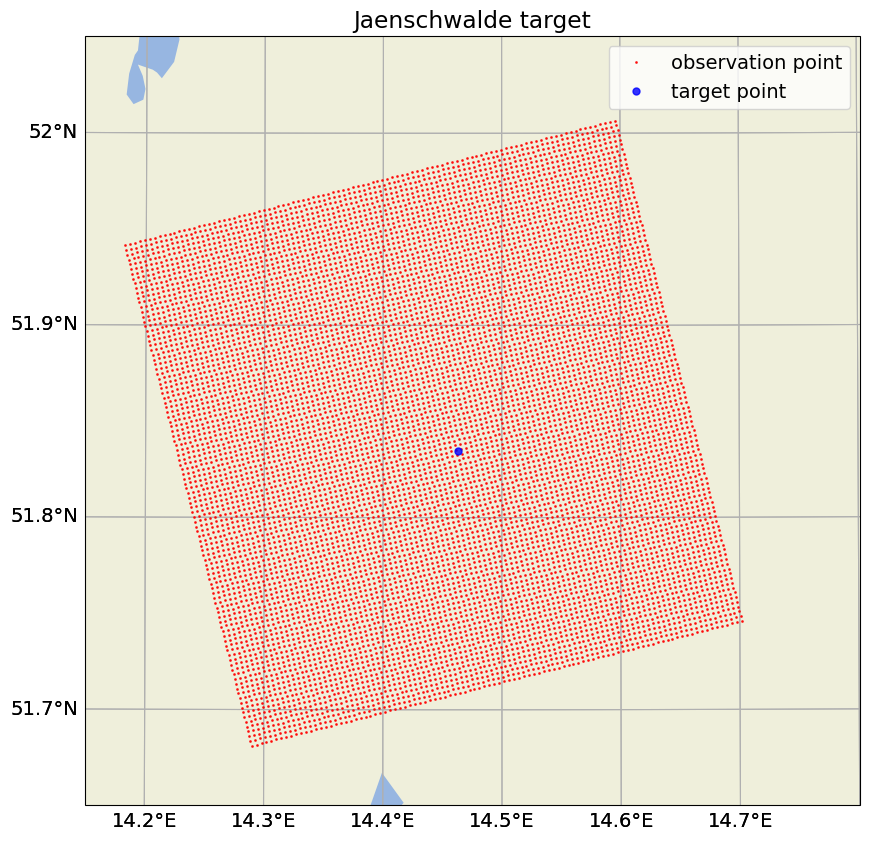

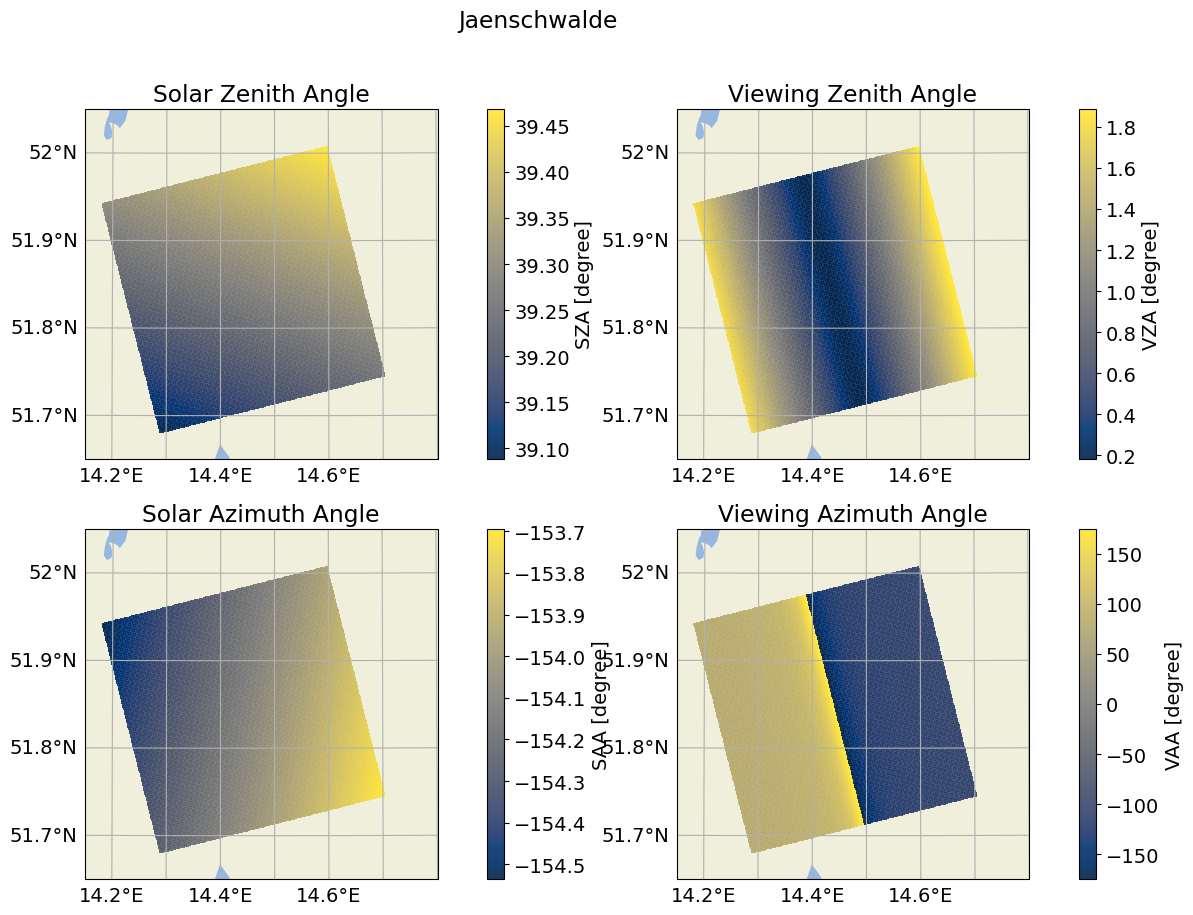

14:22:24 : teds : pam: INFO : Finished PAM


In [9]:
cfg_gm_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_gm_pam['gm']['run'] = True
pam_nitro(cfg_gm_pam)

## 3. Scene Generation Module (SGM)

### 3.1 SGM config
The following config is used for the SGM. It can be changed in-situ.

In [10]:
cfg_sgm = run_E2E.get_specific_config(cfg,'sgm')
print(yaml.dump(cfg_sgm))

atm:
  afgl:
    dzlay: 1000
    nlay: 30
  cams_datetime: 2023-05-23 09:30:00
  cloud:
    act:
      start: 0
      stop: 50
    alt:
      start: 0
      stop: 5
    cloud_bottom_pressure: 900
    cloud_fraction: 1.0
    cloud_optical_thickness: 10.0
    cloud_top_pressure: 800
    use: true
  gases:
  - no2
  - o3
  microHH:
    gases:
    - no2
    use: true
  type: cams
  use_dem: true
header:
  file_name: full_config.yaml
  version: '0.000'
io:
  afgl: ../data/no2/prof.AFGL.US.std
  albedo: ../data/no2/albedo_jaenschwalde.nc
  cams: ../data/cams/cams_global_forecast_20230523.nc
  dem: ../data/no2/dem.nc
  disamar_cfg_template: ../cfg/nitro/disamar_config_sim.in_template
  disamar_exe: ../data/no2/disamar/Disamar_old.exe
  gm: ../data/no2/notebook/geometry.nc
  microHH_filesuffix: src3_20180523_0930
  microHH_folder: ../data/no2/microHH/Jaenschwalde/
  sgm_atm: ../data/no2/notebook/sgm_atmosphere.nc
  sgm_atm_raw: ../data/no2/notebook/sgm_atmosphere_raw.nc
  sgm_rad: ../data/no2/

### 3.2 SGM run

In [11]:
# set library path for ifort, specific for KNMI workstation
# for using ifort DISAMAR
os.environ['LD_LIBRARY_PATH'] = '/opt/intel/oneapi/compiler/2022.1.0/linux/lib:/opt/intel/oneapi/compiler/2022.1.0/linux/lib/x64:/opt/intel/oneapi/compiler/2022.1.0/linux/compiler/lib/intel64_lin'

scene_generation_module_nitro(cfg_sgm)

### 3.3 SGM visualisation

14:22:24 : teds : pam: INFO : Starting PAM
14:22:24 : teds : pam: INFO : Plotting SGM geo


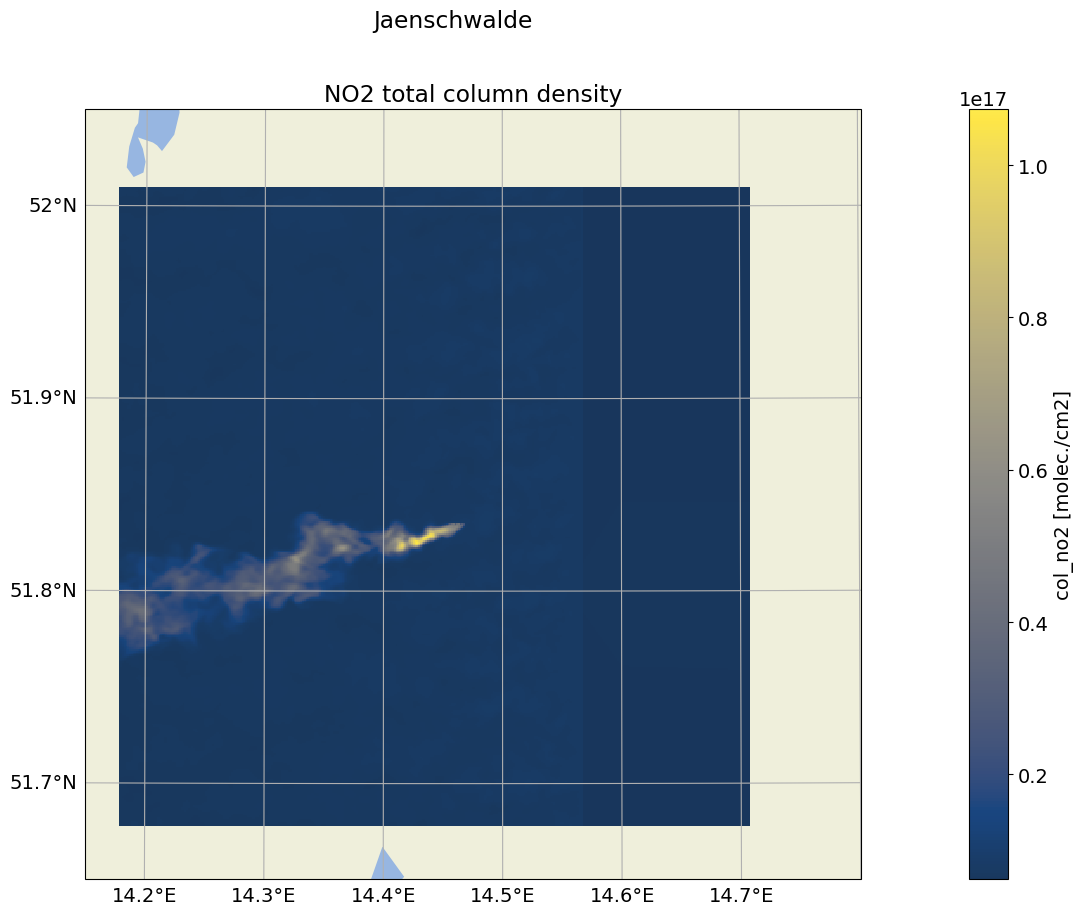

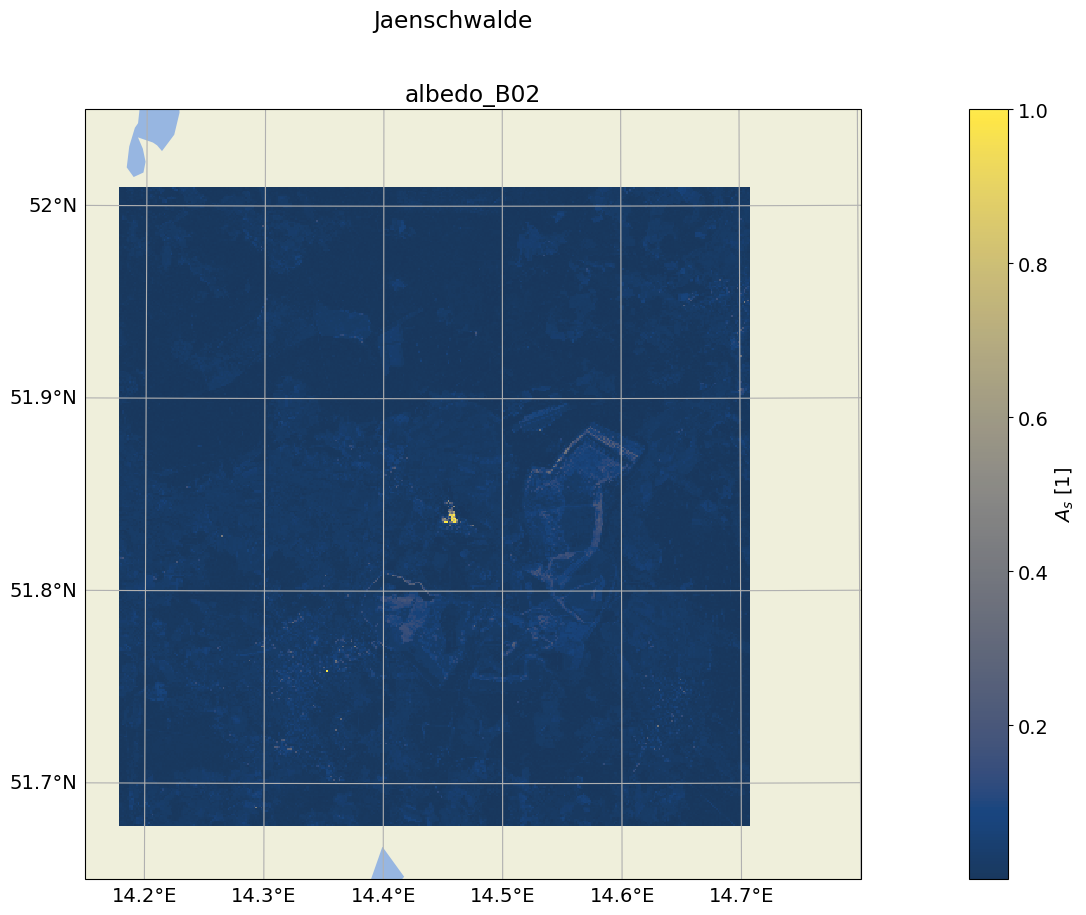

/net/pc230061/nobackup/users/leune/venv/tango/lib64/python3.12/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)


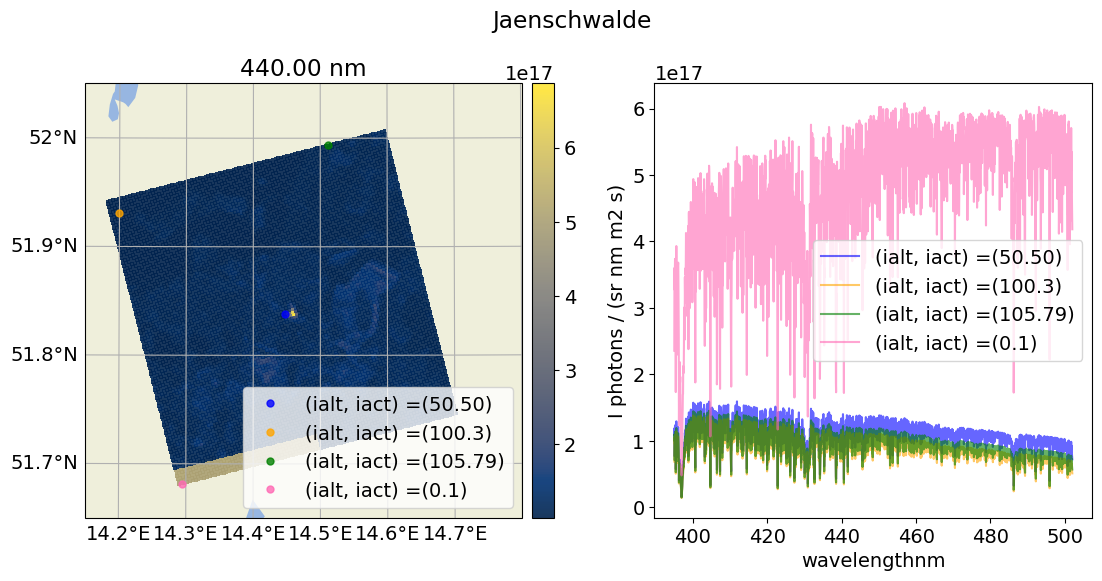

14:22:29 : teds : pam: INFO : Finished PAM


In [12]:
cfg_sgm_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_sgm_pam['sgm']['run'] = True
pam_nitro(cfg_sgm_pam)

## 4. Instrument Module (IM)

### 4.1 IM config
The following config is used for the IM. It can be changed in-situ.

In [15]:
cfg_im = copy.deepcopy(run_E2E.get_specific_config(cfg,'im'))
print(yaml.dump(cfg_im))

im_config_file = f"{os.path.dirname(cfg_file)}/im_config_temp.yaml"
with open(im_config_file,'w') as outfile:
    yaml.dump(cfg_im, outfile)

detector:
  binning_table_id: 1
  exposure_time: 0.021
  nr_coadditions: 1
do_python: false
header:
  file_name: full_config.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/notebook/geometry.nc
  l1a: ../data/no2/notebook/l1a.nc
  sgm: ../data/no2/notebook/sgm_radiance.nc
processing_version: 0.0
proctable:
  algo_list: algos_im
  file: ../cfg/nitro/proctable.yaml



### 4.2 IM run

In [16]:
subprocess.run(["../build/teds/im/tango_im.x", im_config_file], check=True)

NITRO DRIVER
##########################
# Tango instrument model #
##########################
Version                 : 0.0.1
Commit hash             : ed84a30e
Date and timezone       : 2025 January 21 Tue UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.11.10-200.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/im/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Binning table file      : ../data/no2/ckd/binning_table_no2.nc

##############################
# Reading CKD and input data #
##############################
[14:43:32]  Reading dark CKD
[14:43:32]  Reading noise CKD
[14:43:32]  Reading dark CKD
[14:43:32]  Reading stray light CKD
[14:43:32]  Reading swath CKD
[14:43:32]  Reading spectral CKD
[14:43:32]  Reading radiometric CKD
[14:43:32] 

CompletedProcess(args=['../build/teds/im/tango_im.x', '../cfg/nitro/im_config_temp.yaml'], returncode=0)

### 4.3 IM visualisation

14:47:02 : teds : pam: INFO : Starting PAM
14:47:02 : teds : pam: INFO : Plotting L1A


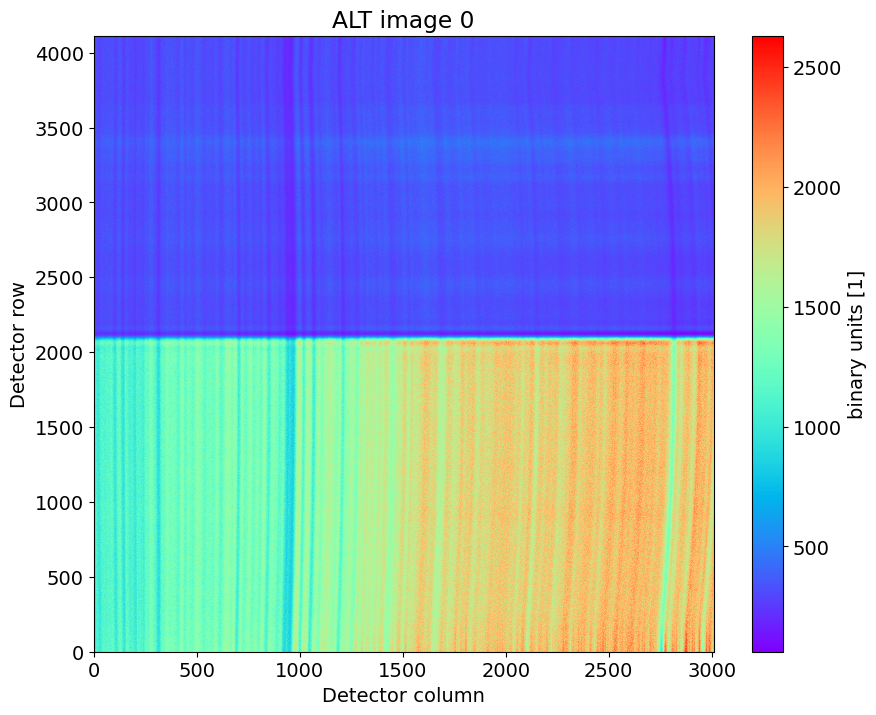

14:47:06 : teds : pam: INFO : Finished PAM


In [17]:
cfg_im_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_im_pam['im']['run'] = True
pam_nitro(cfg_im_pam)

## 5. L1A to L1B Processor

### 5.1 L1B config
The following config is used for the L1B processor. It can be changed in-situ.

In [18]:
cfg_l1b = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1al1b'))

print(yaml.dump(cfg_l1b))

l1b_config_file = f"{os.path.dirname(cfg_file)}/l1b_config_temp.yaml"
with open(l1b_config_file,'w') as outfile:
    yaml.dump(cfg_l1b, outfile)

do_python: false
header:
  file_name: full_config.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/notebook/geometry.nc
  l1a: ../data/no2/notebook/l1a.nc
  l1b: ../data/no2/notebook/l1b.nc
processing_version: 0.0
proctable:
  algo_list: algos_l1b
  file: ../cfg/nitro/proctable.yaml



### 5.2 L1B run

In [19]:
subprocess.run(["../build/teds/l1al1b/tango_l1b.x", l1b_config_file], check=True)

NITRO DRIVER
#######################
# Tango L1B processor #
#######################
Version                 : 0.0.1
Commit hash             : ed84a30e
Date and timezone       : 2025 January 21 Tue UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.11.10-200.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/l1al1b/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Linking against         : /usr/lib64/libnetcdf_c++4.so
                          /usr/lib64/libnetcdf.so
                          /usr/lib64/liblapack.so
                          OpenMP::OpenMP_CXX
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/spdlog-src/include
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/yaml-cpp-src/include
  

CompletedProcess(args=['../build/teds/l1al1b/tango_l1b.x', '../cfg/nitro/l1b_config_temp.yaml'], returncode=0)

### 5.3 L1B visualisation

14:53:54 : teds : pam: INFO : Starting PAM
14:53:54 : teds : pam: INFO : Plotting L1B


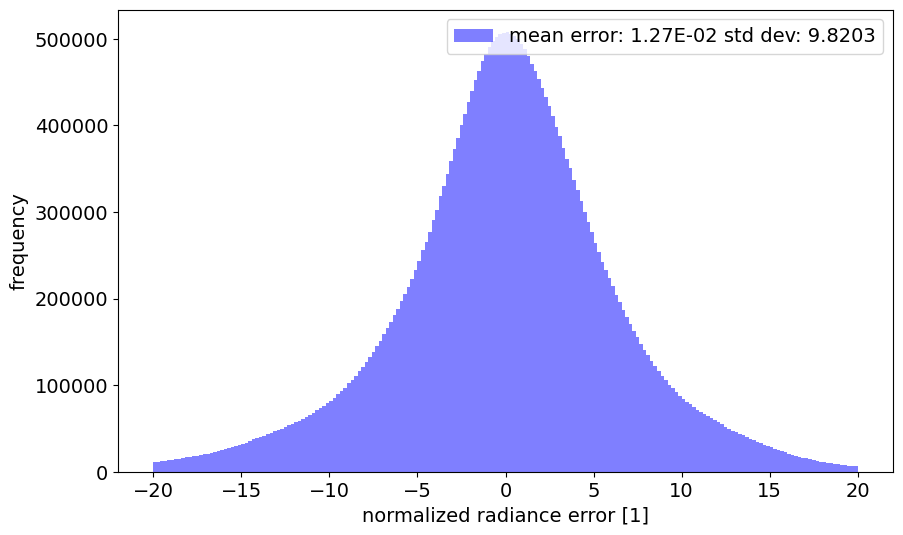

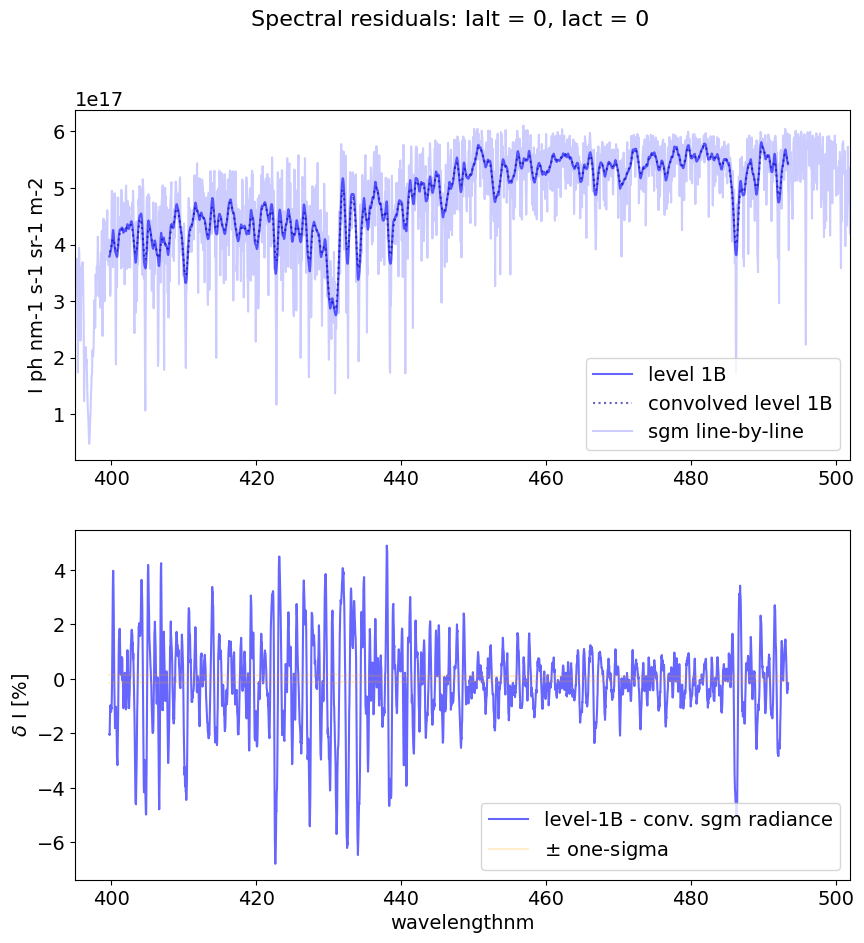

14:54:11 : teds : pam: INFO : Finished PAM


In [20]:
cfg_l1b_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l1b_pam['l1b']['run'] = True
pam_nitro(cfg_l1b_pam)

## 6. L1B to L2 Processor

### 6.1 L2 config
The following config is used for the L2 processor. It can be changed in-situ.

In [21]:
cfg_l2 = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1l2'))

print(yaml.dump(cfg_l2))

LUT_NN_file: ../data/no2/LUT_NN_combined_20240429.nc
convolve_irr: ISRF
convolve_rad: ISRF
debug:
  log: false
  plot: false
export_spectra: false
gaussian_fwhm: 0.6
header:
  file_name: full_config.yaml
  version: '0.000'
io:
  gm: ../data/no2/notebook/geometry.nc
  l1b: ../data/no2/notebook/l1b.nc
  l2: ../data/no2/notebook/l2.nc
  sgm_atm: ../data/no2/notebook/sgm_atmosphere.nc
  sgm_rad: ../data/no2/notebook/sgm_radiance.nc
irr_from_sgm: true
isrf_file: ./ckd/ckd_generation/data_external/Nominal_ISRF_dataset_17102024.xlsx
no2:
  convergence_threshold: 1.0
  fit_window:
  - 405.0
  - 465.0
  intensity_coefs: 0
  intensity_scaling_factor: 1.0
  max_iterations: 8
  max_outliers: 10
  polynomial_coefs: 6
  prior:
    doas:
      C0:
      - 1.0
      - 1.0
      C1:
      - 0.125
      - 0.125
      C2:
      - 0.015625
      - 0.015625
      C3:
      - 0.015625
      - 0.015625
      Cring:
      - 0.06
      - 0.2
      Dring:
      - 0.06
      - 0.2
      H20liq:
      - 0.0
     

### 6.2 L2 run

In [22]:
l1bl2_no2(cfg_l2)

14:55:41 : teds : libConv: INFO : Convolving irradiance from SGM with ISRF
14:55:55 : teds : libDOAS: INFO : === Start IFDOE processing NO2
14:55:55 : teds : libDOAS: INFO : Parameter names: ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'O2O2', 'NO2', 'O3']
14:55:55 : teds : libDOAS: INFO : === Reading ref.spec.
14:55:55 : teds : libDOAS: INFO : === Calibrating solar spectrum
14:55:58 : teds : libDOAS: INFO : === Starting radiance calibration and DOAS
14:55:58 : teds : libDOAS: INFO : Processing with 6 threads
14:56:28 : teds : libDOAS: INFO : Processed scanline 1/106 in 30.46s
14:56:57 : teds : libDOAS: INFO : Processed scanline 7/106 in 28.95s
14:56:58 : teds : libDOAS: INFO : Processed scanline 3/106 in 60.21s
14:56:59 : teds : libDOAS: INFO : Processed scanline 5/106 in 61.08s
14:56:59 : teds : libDOAS: INFO : Processed scanline 6/106 in 61.39s
14:57:00 : teds : libDOAS: INFO : Processed scanline 4/106 in 61.74s
14:57:01 : teds : libDOAS: INFO : Processed scanline 2/106 in 62.61s
14:57:27 :

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10600/10600 [02:37<00:00, 67.11it/s]

15:16:50 : teds : l1bl2_no2: INFO : Writing cloud results to: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Cloud calculation finished in 211.0 s
15:16:50 : teds : l1bl2_no2: INFO : Reading DOAS results from L2 file: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Reading atm file: ../data/no2/notebook/sgm_atmosphere.nc
15:16:50 : teds : l1bl2_no2: INFO : Reading cloud results from L2 file: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Calculating AMF


15:17:41 : teds : l1bl2_no2: INFO : Writing AMF results to: ../data/no2/notebook/l2.nc
15:17:41 : teds : l1bl2_no2: INFO : AMF calculation finished in 51.0 s
15:17:41 : teds : l1bl2_no2: INFO : L1L2 calculation finished in 1320.3 s


### 6.3 L2 visualisation

15:21:50 : teds : pam: INFO : Starting PAM
15:21:50 : teds : pam: INFO : Plotting L2


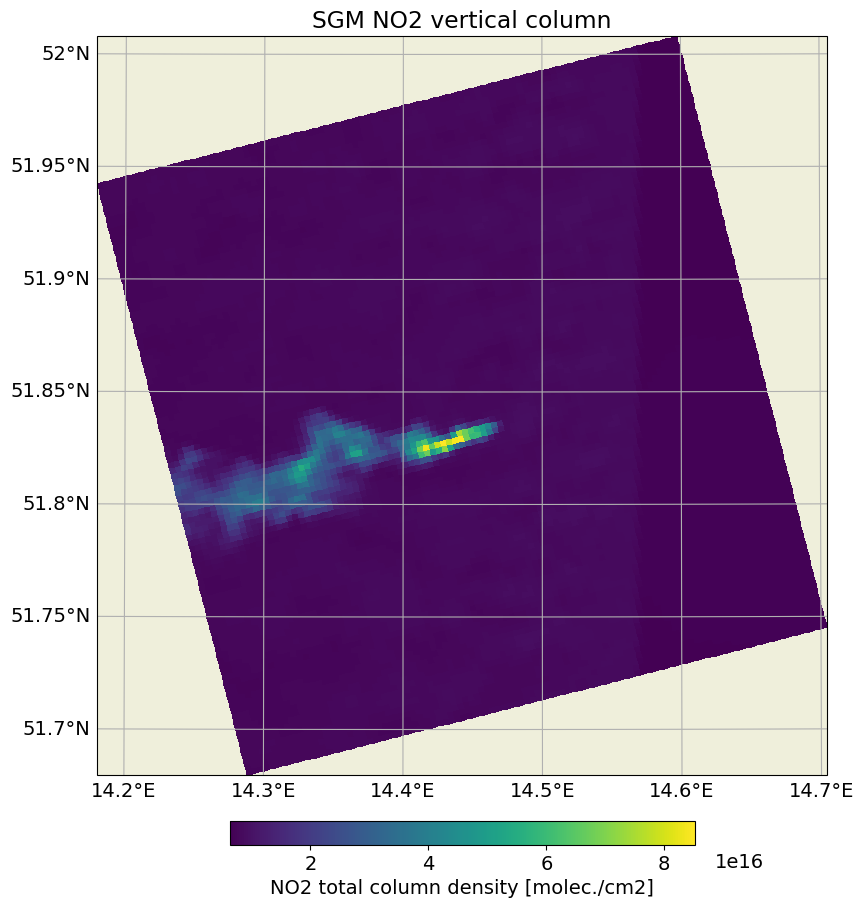

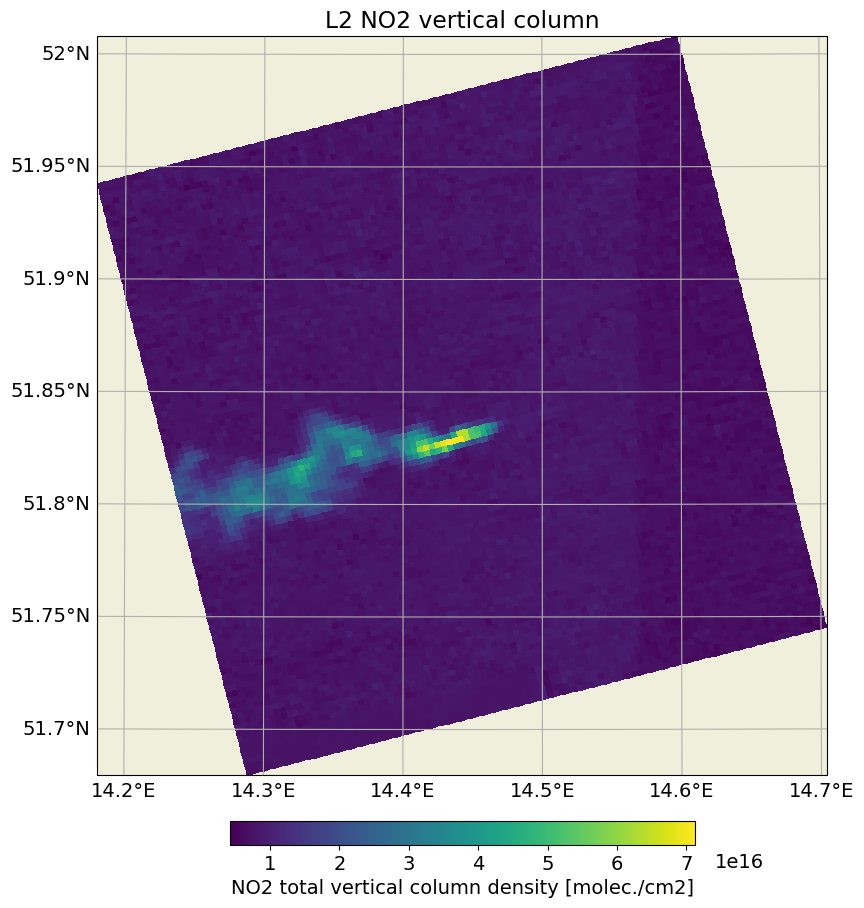

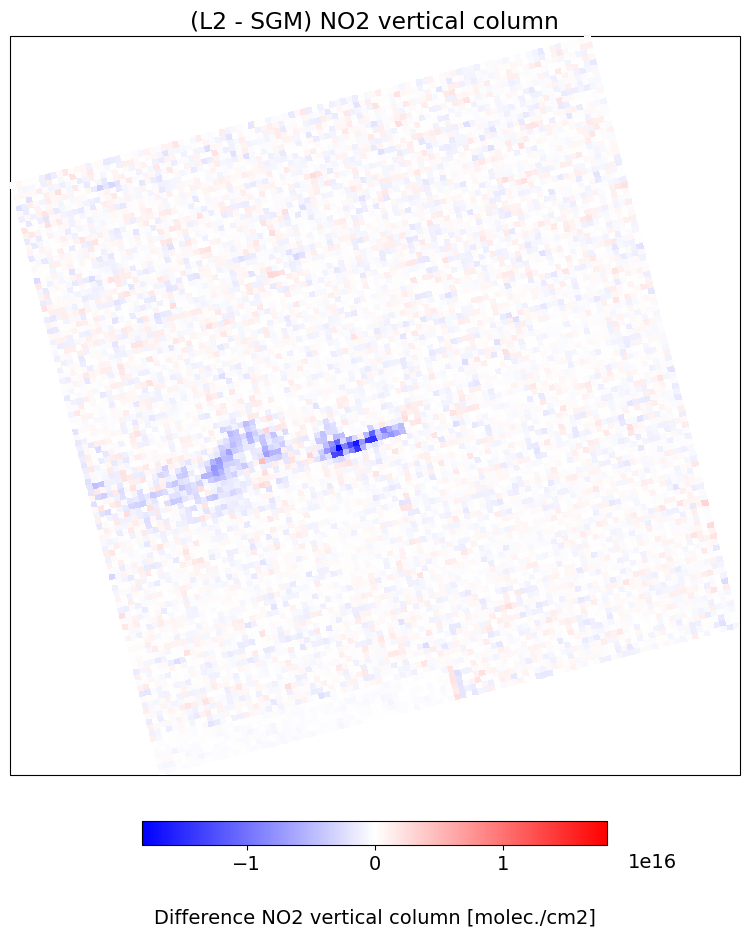

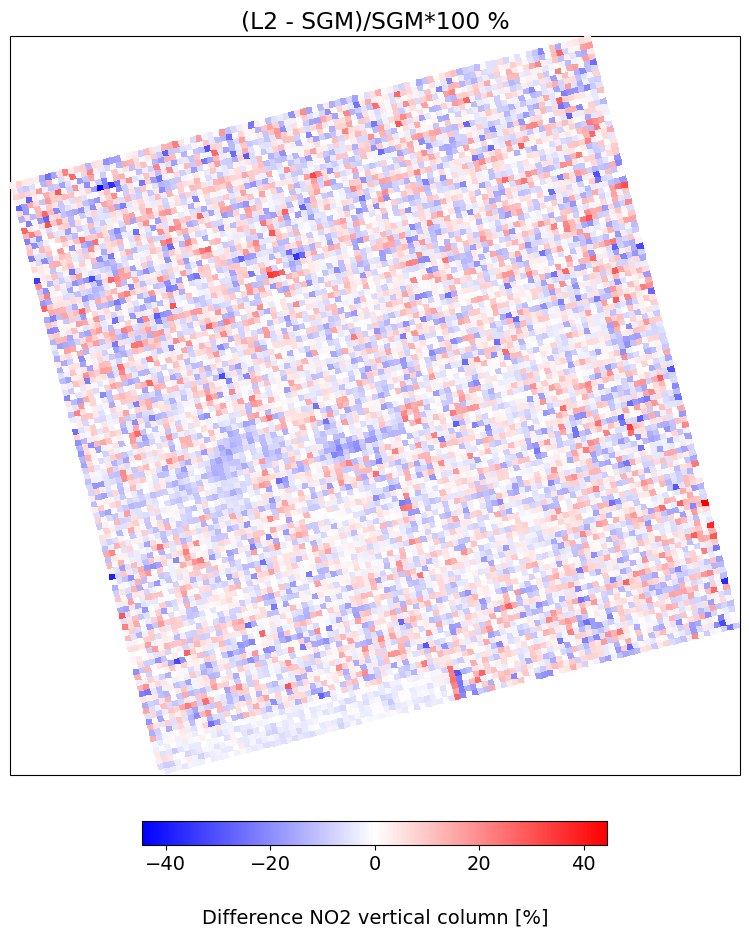

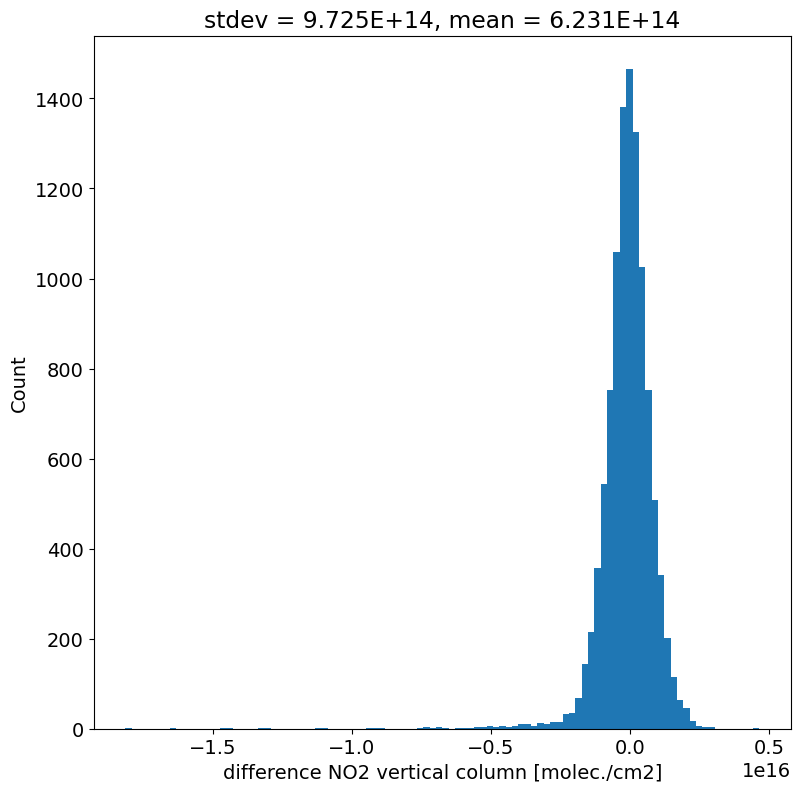

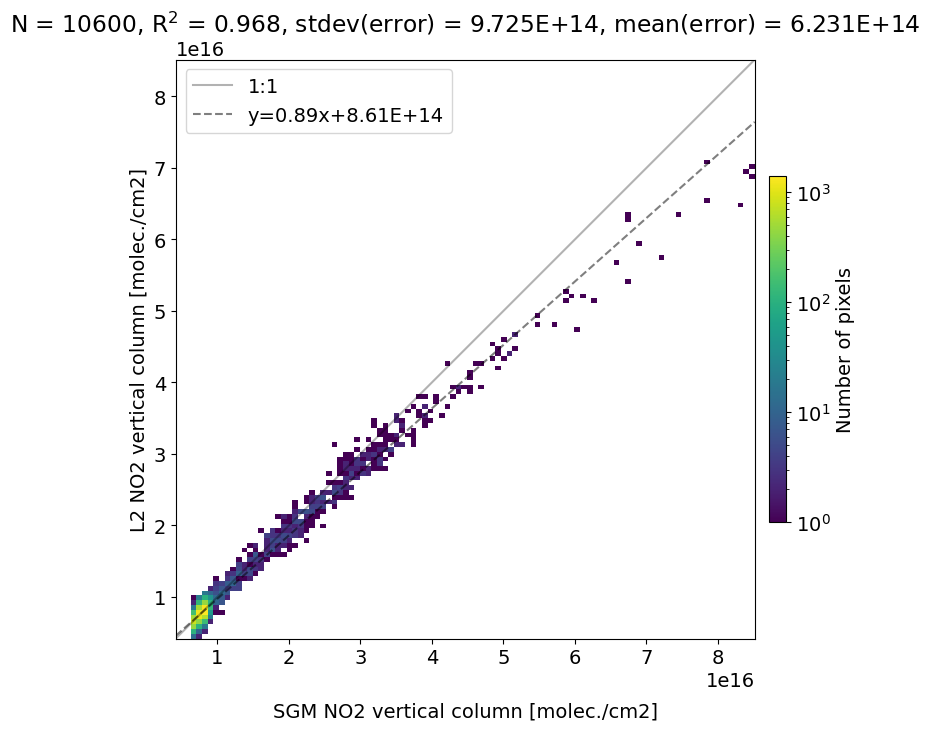

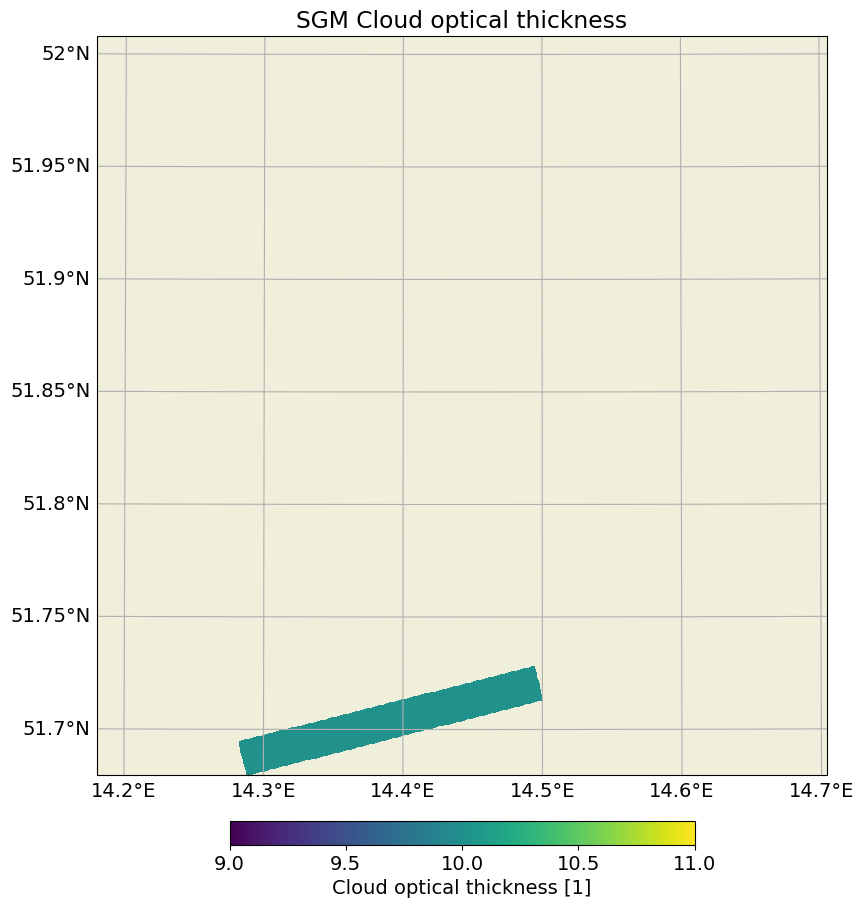

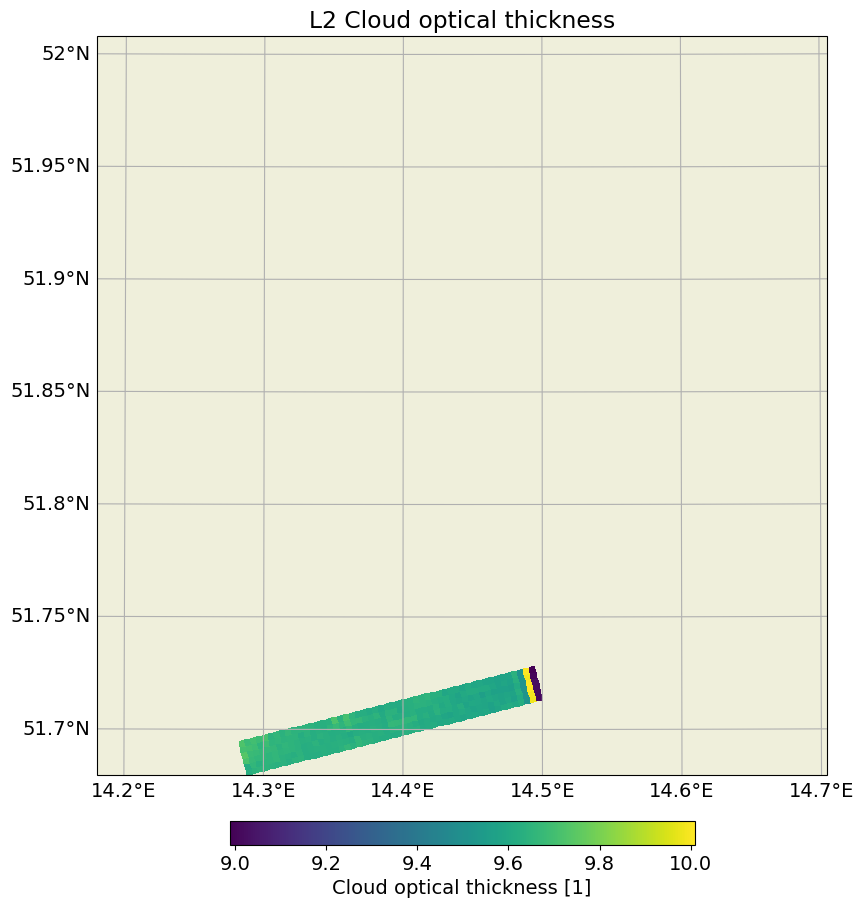

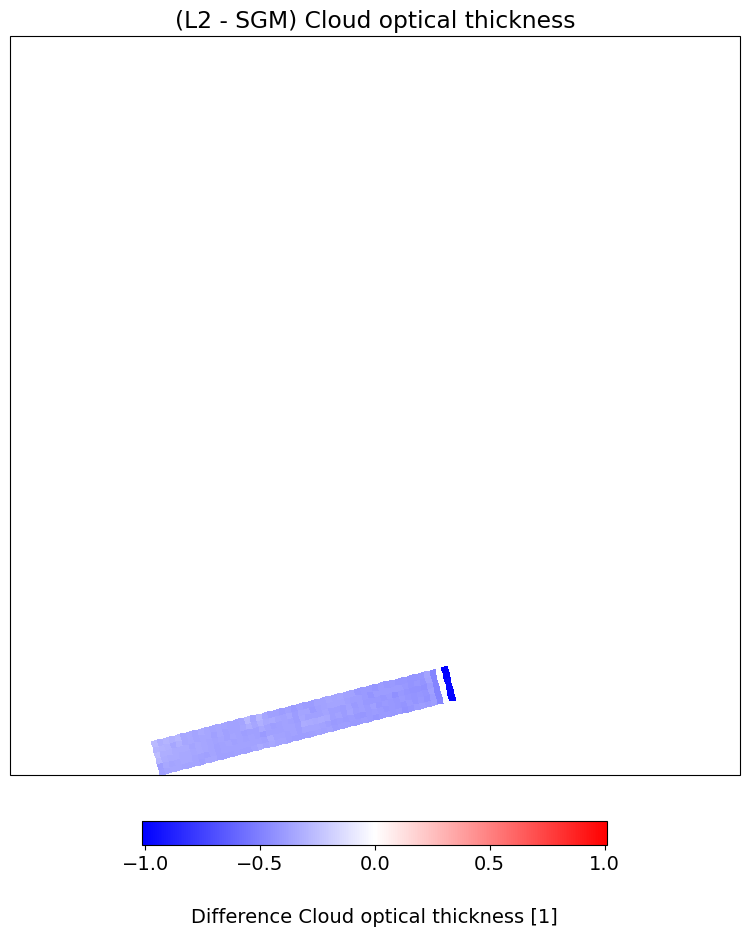

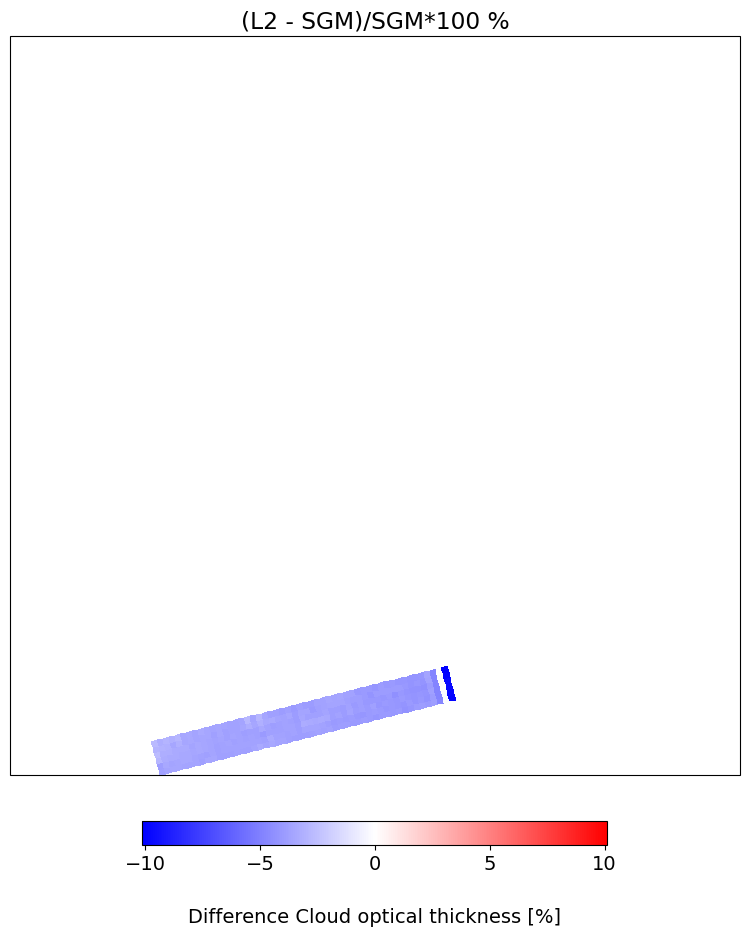

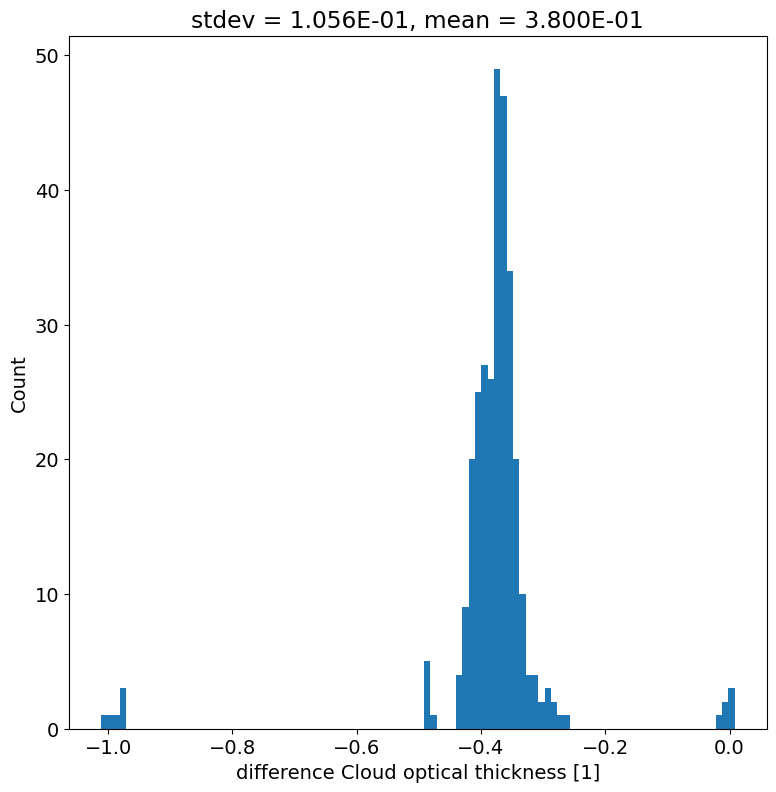

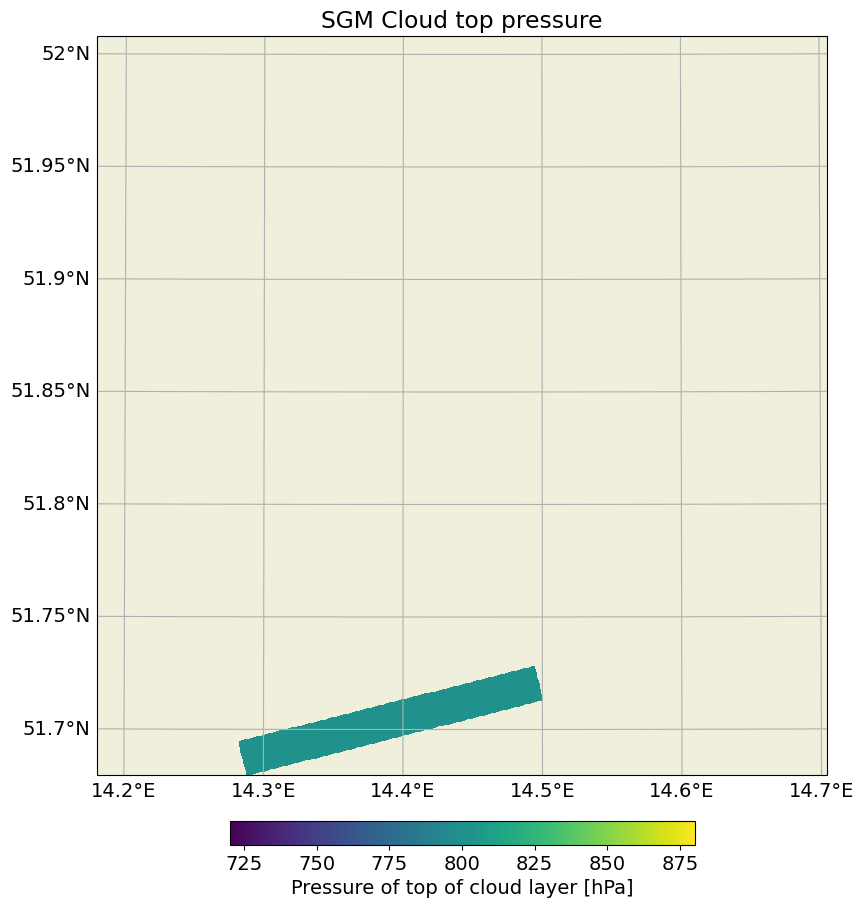

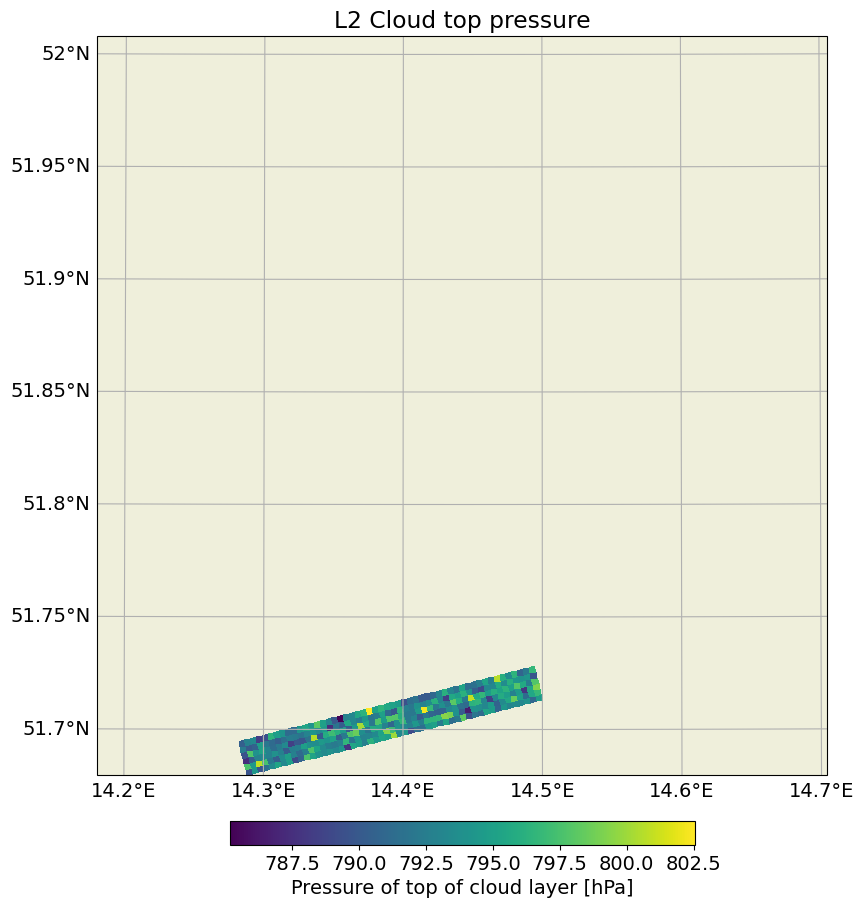

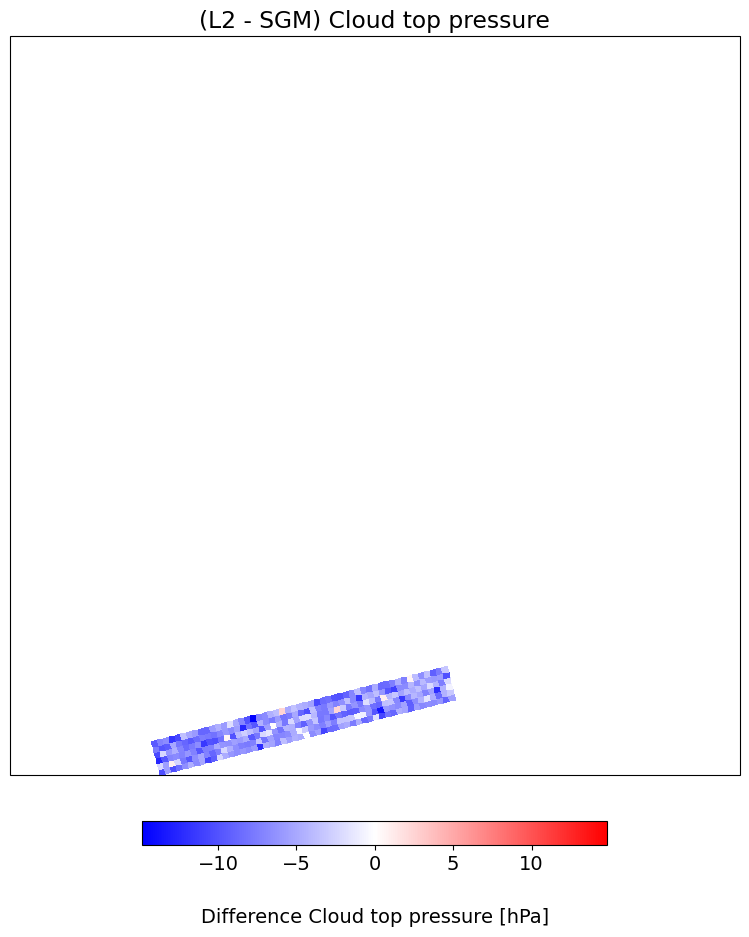

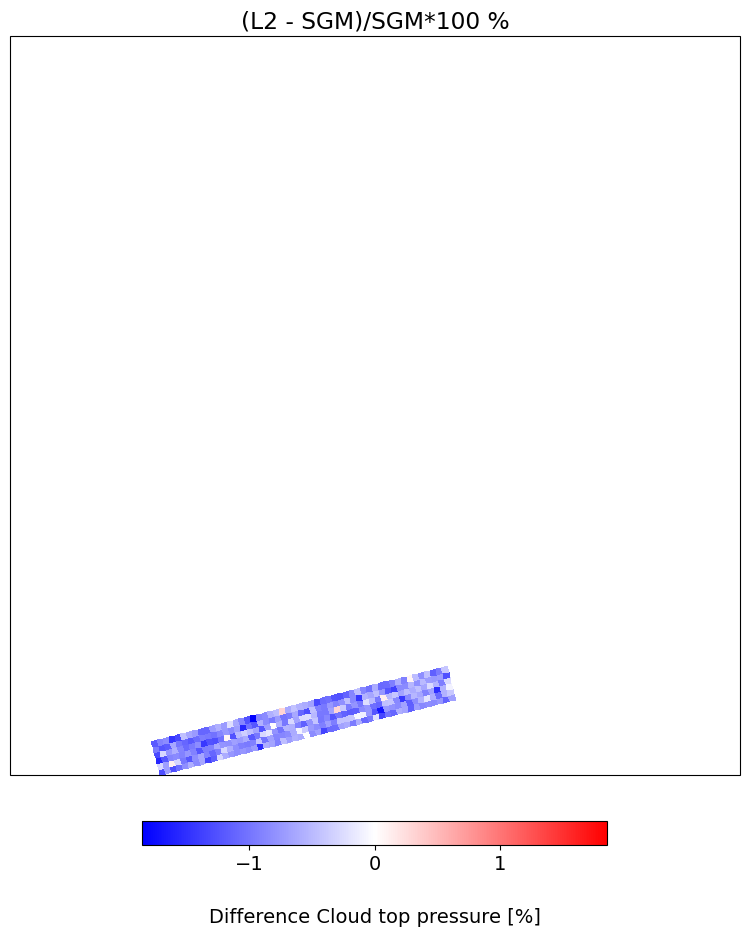

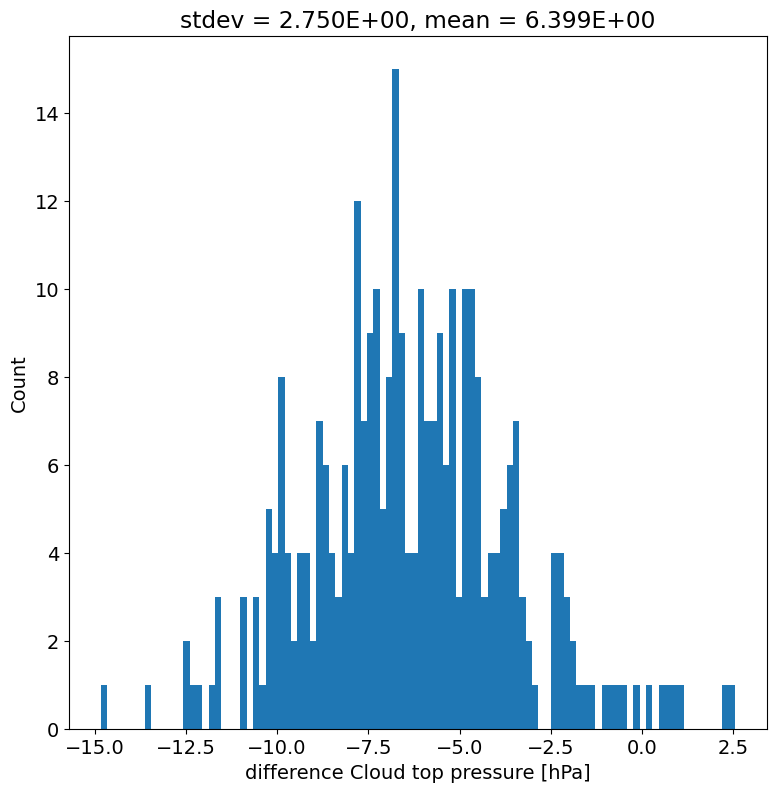

15:22:07 : teds : pam: INFO : Finished PAM


In [23]:
cfg_l2_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l2_pam['l2']['run'] = True
pam_nitro(cfg_l2_pam)